## SVM

In [ ]:
import numpy as np
from scipy.optimize import minimize

# Input data
X = np.array([[1, 1], [2, 0.5], [40, 40], [50, 35]])
y = np.array(['a', 'a', 'b', 'b']) 

In [ ]:
# Re-label data to {-1, 1} for SVM compatibility
y = np.where(y == 'a', -1, 1)  
y

array([-1, -1,  1,  1])

In [ ]:
# Add a bias term to the feature matrix (append a column of ones)
X_with_bias = np.hstack((X, np.ones((X.shape[0], 1))))
X_with_bias

array([[ 1. ,  1. ,  1. ],
       [ 2. ,  0.5,  1. ],
       [40. , 40. ,  1. ],
       [50. , 35. ,  1. ]])

In [ ]:
# Define identity matrix (P = I for quadratic term)
P = np.eye(X_with_bias.shape[1])  
P

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# Define quadratic term-setting it into zero we neglect the impact (we are interested in maximazing the margin)
q = np.zeros(X_with_bias.shape[1]) 
q

array([0., 0., 0.])

In [ ]:
# Objective function: 1/2 * w^T * P * w + q^T * w
def objective(w):
    return 0.5 * np.dot(w.T, np.dot(P, w)) + np.dot(q.T, w)

# Constraints: y_i * (w^T x_i + b) - 1 >= 0 for each data point
def constraints(w):
    return y * (np.dot(X_with_bias, w)) - 1

In [ ]:
# Initial guess for the variables: weights + bias
w0 = np.zeros(X_with_bias.shape[1])

# Solve the optimization problem using SLSQP
result = minimize(objective, w0, constraints={'type': 'ineq', 'fun': constraints}, method='SLSQP')

In [ ]:
# Print the result
if result.success:
    print("Optimal weights (w1, w2):", result.x[:-1])
    print("Optimal bias (b):", result.x[-1])
else:
    print("Optimization failed:", result.message)

Optimal weights (w1, w2): [0.01709402 0.03418803]
Optimal bias (b): -1.0512820512820509


In [ ]:
# Predict function to evaluate the decision function on the training data
def predict(X, w, b):
    return np.sign(np.dot(X, w) + b)

# Extract the weights and bias from the result
optimal_weights = result.x[:-1]
optimal_bias = result.x[-1]

# Make predictions on the training data
predictions = predict(X, optimal_weights, optimal_bias)

# Print predictions and true labels
print("Predictions:", predictions)
print("True Labels:", y)

# Calculate and print accuracy
accuracy = np.mean(predictions == y)
print("Accuracy:", accuracy)

Predictions: [-1. -1.  1.  1.]
True Labels: [-1 -1  1  1]
Accuracy: 1.0


In [ ]:
# Make predictions on the training data
new_point1 = np.array([0,20])
predictions = predict(new_point1, optimal_weights, optimal_bias)
predictions

-1.0

In [ ]:
# Make predictions on the training data
new_point2 = np.array([0,40])
predictions = predict(new_point2, optimal_weights, optimal_bias)
predictions

1.0

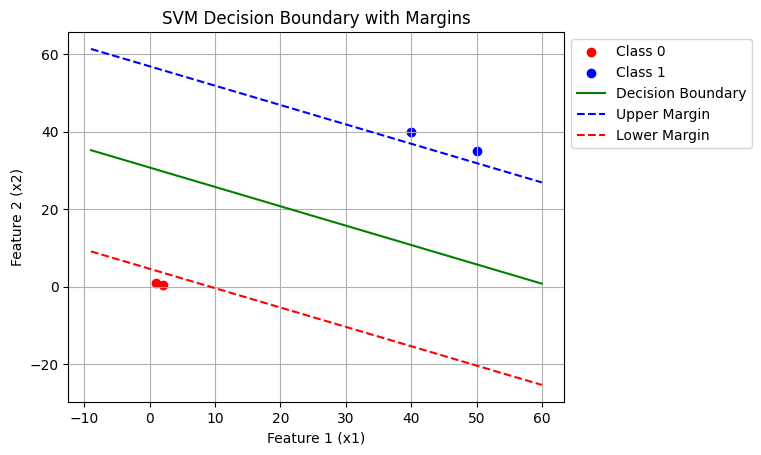

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the data and labels
X = np.array([[1, 1], [2, 0.5], [40, 40], [50, 35]])  # Feature matrix
y = np.array([0, 0, 1, 1])  # Labels (0 or 1)

# Optimal weights and bias
w1, w2 = 0.01709402, 0.03418803
b = -1.0512820512820509

# Create a scatter plot of the data points
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Class 1')

# Generate the hyperplane
x_vals = np.linspace(min(X[:, 0]) - 10, max(X[:, 0]) + 10, 100)
x2_vals = - (w1 / w2) * x_vals - (b / w2)

# Plot the hyperplane
plt.plot(x_vals, x2_vals, color='green', label='Decision Boundary')

# Plot the margins (support vectors)
margin = 1 / np.sqrt(w1**2 + w2**2)
margins_upper = x2_vals + margin
margins_lower = x2_vals - margin

plt.plot(x_vals, margins_upper, 'b--', label='Upper Margin')
plt.plot(x_vals, margins_lower, 'r--', label='Lower Margin')

# Plotting settings
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('SVM Decision Boundary with Margins')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Move legend out of the plotting area
plt.grid(True)
plt.show()
